# Linear Regression: Model Validation

We will examine how well the model generalizes to new observations.

## Step 1: Loading the data

Read the data file into a Pandas DataFrame called `home_data`.

In [25]:
import pandas as pd

# Path of the file to read
data_path = "train.csv"
home_data = pd.read_csv(data_path)

print("Setup Complete")
home_data.head()

Setup Complete


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We will select the **features** which by convention are called **X**. We will also choose the target variable which we typically call `y`.

## Step 2: Create X
Now you will create a DataFrame called **`X`** holding the predictive features.

Since you want only some columns from the original data, you'll first create a list with the names of the columns you want in `X`.

There are a number of columns you can put in the list (you can copy and paste the whole list to save some typing, though you'll still need to add quotes):
 * LotArea
  * YearBuilt
  * FullBath

After you've created that list of features, use it to create the DataFrame that you'll use to fit the model.

In [38]:
feature_names = [---]

X = home_data[feature_names]
y = home_data["SalePrice"]

We create the linear model with all the features and compute its MAE.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X,y)

predicted = model.predict(X)
mae = mean_absolute_error(predicted, y)
 
print("MAE = %.2f" % mae)

How much is the MAE? You should find a value of 40372.31

# Exercise on Train/Test Split

## Step 1: Split Your Data
Use the `train_test_split` function to split up your data.

Give it the argument `random_state=1` so the `check` functions know what to expect when verifying your code.

Recall, your features are loaded in the DataFrame **X** and your target is loaded in **y**.

In [40]:
# Import the train_test_split function and uncomment
# from _ import _

# fill in and uncomment
# train_X, val_X, train_y, val_y = train_test_split(---, ---, random_state=1)

In [62]:
# Import the train_test_split function and uncomment
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

## Step 2: Specify and Fit the Model

Create a `LinearRegression` model and fit it to the relevant data.

In [42]:
# Specify the model
iowa_model = LinearRegression()

# Fit the model with the *TRAINING* data
iowa_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Step 3: Make Predictions with Validation data


In [43]:
# Predict with all validation observations
#val_predictions = ____

In [44]:
val_predictions = iowa_model.predict(val_X)

## Step 4: Calculate the Mean Absolute Error in Validation Data

In [47]:
#from sklearn.metrics import mean_absolute_error
#val_mae = ____

# uncomment following line to see the validation_mae
#print(val_mae)


In [ ]:
val_mae = mean_absolute_error(val_predictions, val_y)
print(val_mae)

Using the training data the MAE was ~40000 and now it is ~41500. It has increased which is what we expected.

# Comparing Models of Different "Complexity"


In [49]:
def model_mae(train_X, val_X, train_y, val_y):
    """
    Computes the MAE for a DataFrame
    """
    model = LinearRegression()
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

Let's see which are the attributes that are most correlated with the SalePrice.

In [50]:
feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'OverallQual',
'OverallCond', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',  'SalePrice']

# select data corresponding to features in feature_names
home_data = pd.read_csv(data_path)
df = home_data[feature_names]
corr = df.corr().iloc[:-1,-1].to_frame() #just correlation of last column to rest
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,SalePrice
LotArea,0.26
YearBuilt,0.52
1stFlrSF,0.61
2ndFlrSF,0.32
FullBath,0.56
BedroomAbvGr,0.17
TotRmsAbvGrd,0.53
OverallQual,0.79
OverallCond,-0.078
KitchenAbvGr,-0.14


In [53]:
# let's put them in decreasing order of correlation
feature_names = ['OverallQual', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'TotRmsAbvGrd', 'YearBuilt', '2ndFlrSF',  'WoodDeckSF',  'OpenPorchSF', 'LotArea', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', '3SsnPorch']

X = home_data[feature_names]
y = home_data["SalePrice"]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

mae_test_all = []
mae_train_all = []

for numfeatures in range(1,len(feature_names)+1):
   
    #select the first numfeatures
    train_X_new = train_X.iloc[:,0:numfeatures]
    val_X_new = val_X.iloc[:,0:numfeatures]
    
    mae_test = model_mae(train_X_new, val_X_new, train_y, val_y)
    mae_train = model_mae(train_X_new, train_X_new, train_y, train_y)
    
    print("Number of features:%d \t MAE - test:%.2f \t MAE - train:%.2f" % (numfeatures, mae_test, mae_train))
    
    mae_test_all.append(mae_test)
    mae_train_all.append(mae_train)

Number of features:1 	 MAE - test:31935.50 	 MAE - train:34190.91
Number of features:2 	 MAE - test:29733.66 	 MAE - train:30297.92
Number of features:3 	 MAE - test:29080.38 	 MAE - train:29493.53
Number of features:4 	 MAE - test:27883.46 	 MAE - train:28543.82
Number of features:5 	 MAE - test:27883.46 	 MAE - train:28543.82
Number of features:6 	 MAE - test:27105.95 	 MAE - train:27415.74
Number of features:7 	 MAE - test:24762.12 	 MAE - train:25579.53
Number of features:8 	 MAE - test:24494.40 	 MAE - train:25119.03
Number of features:9 	 MAE - test:24521.96 	 MAE - train:25029.03
Number of features:10 	 MAE - test:24199.52 	 MAE - train:24427.43
Number of features:11 	 MAE - test:23598.35 	 MAE - train:24337.18
Number of features:12 	 MAE - test:23712.03 	 MAE - train:24285.12
Number of features:13 	 MAE - test:24125.12 	 MAE - train:24345.66
Number of features:14 	 MAE - test:24058.95 	 MAE - train:24370.44


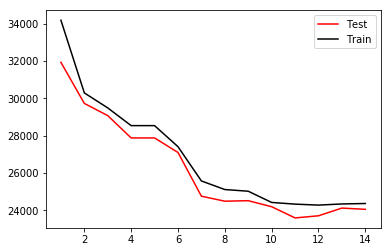

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(1,15), mae_test_all, 'r-')
plt.plot(range(1,15), mae_train_all, 'k-')
plt.legend(['Test','Train'])

How many dimensions should we keep?